# Метод Гаусса 

My time:  [0.15822672843933105, 0.5739479064941406, 1.3904681205749512, 2.341061592102051, 3.7289059162139893]
lib_time:  [0.025662899017333984, 0.0018117427825927734, 0.0182340145111084, 0.009048938751220703, 0.016607999801635742]


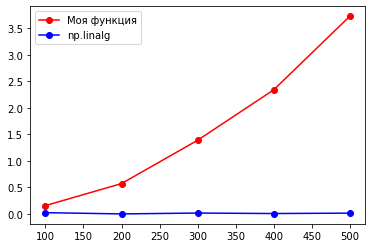

Оценим норму разности решений функции gauss и библиотечной функции: 
4.9673428657094446e-17


In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

###### Метод Гаусса ########
def gauss(A, f):
    n = f.size
    x = np.zeros(n)

    for k in range(n):
        f[k] = f[k] / A[k][k]
        A[k] = A[k] / A[k][k]
        for i in range(k + 1, n):
            f[i] = f[i] - f[k] * A[i][k]
            A[i] = A[i] - A[k] * A[i][k]
            A[i][k] = 0

    for i in range(n - 1, -1, -1):
        x[i] = f[i]
        for j in range(i + 1, n):
            x[i] = x[i] - A[i][j] * x[j]

    return x


    
##### Превращение матрицы в матрицу с диагональным преобладанием
def diag_major(A):
    n = A.shape[0]
    for i in range(n):      # Делаем диагональный элемент уж точно больше суммы
        sum = 0                                          #  всех в строке
        for j in range(n):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum
    

########## Проверка метода Гаусса ###############
def check_gauss():
    n = 5      # n * 100 - максимальный порядок матриц
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        A = np.random.rand(100 * (i+1), 100 * (i+1))
        f = np.random.rand(100 * (i+1))

        diag_major(A) # диагональное преобладание

        start_time = time.time()   # библиотечный метод
        np_x = np.linalg.solve(A, f)
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()   # "мой" метод
        my_x = gauss(A, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='np.linalg')
    plt.legend()

    plt.show()
    
    print('Оценим норму разности решений функции gauss и библиотечной функции: ')
    err = np.linalg.norm(np_x-my_x)
    print(err)
    
check_gauss()





# Метод Холецкого

My time:  [0.5030434131622314, 3.7308413982391357, 11.63319993019104]
lib_time:  [0.0010576248168945312, 0.0019626617431640625, 0.0037784576416015625]


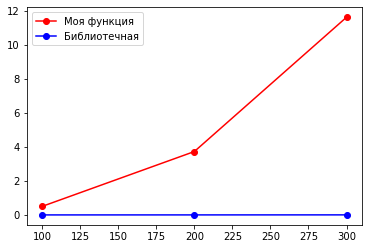

Оценим норму разности решений функции gauss и библиотечной функции: 
0.013425570866286353


In [51]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

# Метод Холецкого решения СЛАУ
def cholecky(A, f):
    n = A.shape[0]
    U = np.zeros((n, n))

    for i in range(n):

                       # На данном этапе создаем матрицу U
        sum = 0        # которая определяется из формулы A = U(transp) * U
        for k in range(i):
            sum += U[k][i] ** 2
        U[i][i] = (A[i][i] - sum) ** 0.5

        for j in range(i+1, n):
            sum = 0
            for k in range(i):
                sum += U[k][i] * U[k][j]
            U[i][j] = (A[i][j] - sum) / U[i][i]
            
                        # Остается решить прямой метод
                        # И обратный
            
    # U(transp) * y = f
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i):
            sum += U[k][i] * y[k]
        y[i] = (f[i] - sum) / U[i][i]
        
    # U * x = y
    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i+1, n):
            sum += U[i][k] * x[k]
        x[i] = (y[i] - sum) / U[i][i]
        
    return x




##### Превращение матрицы в матрицу с диагональным преобладанием
def diag_major(A):
    n = A.shape[0]
    for i in range(n):      # Делаем диагональный элемент уж точно больше суммы
        sum = 0                                          #  всех в строке
        for j in range(n):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum
    


def check_cholecky():
    n = 3      # n * 100 - максимальный порядок матриц
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        A = np.random.rand(100 * (i+1), 100 * (i+1))
        f = np.random.rand(100 * (i+1))

        diag_major(A) # диагональное преобладание

        start_time = time.time()   # библиотечный метод
        U = np.linalg.cholesky(A)
        y = solve_triangular(U, f, lower=True)
        U = np.transpose(U)
        lib_x = solve_triangular(U, y, lower=False)
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()   # "мой" метод
        my_x = cholecky(A, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='Библиотечная')
    plt.legend()

    plt.show()
    
    print('Оценим норму разности решений функции gauss и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)

check_cholecky()




# Метод прогонки (3х диагональной матрицы)

My time:  [0.0065920352935791016, 0.013459920883178711, 0.020353078842163086, 0.02728271484375, 0.03756284713745117]
Lib time:  [0.00038313865661621094, 0.00042510032653808594, 0.0004646778106689453, 0.0004782676696777344, 0.0006072521209716797]


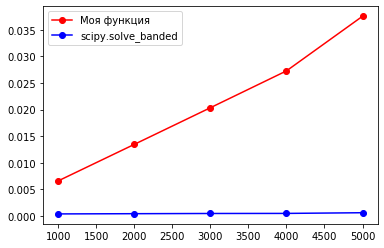

In [44]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded


############ Прогонка #################
def sweep (a, b, c, f):
    n = f.size
    
    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0
    
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d
        
    x[n-1] = betta[n]
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    x = x[:-1]
    return x


def diag_major(a, b, c):
    n = len(b)
    for i in range(n):
        sum = abs(a[i]) + abs(c[i])
        b[i] = abs(b[i]) + sum


############ Проверка прогонки ##############
def check_sweep():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*1000 for i in range(1, n+1)]

    for i in range(0, n):
        size = 1000 * (i+1)
        a = np.random.rand(size)
        b = np.random.rand(size)
        c = np.random.rand(size)
        f = np.random.rand(size)
        
        diag_major(a, b, c)   # матрица теперь с диаг. преобладанием
        
        # для библиотечной solve_banded
        af = np.random.rand(3, size)
        af[0] = c
        af[1] = b
        af[2] = a
        
        start_time = time.time()
        lib_x = solve_banded((1,1), af, f)
        end_time = time.time()
        lib_time[i] = end_time - start_time
        

        start_time = time.time()
        my_x = sweep(a, b, c, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    
    print('My time: ', my_time)
    print('Lib time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.solve_banded')
    plt.legend()

    plt.show()
    
    # Норма разности решений не в близи нуля
    # *Ошибка в решении - проверить индексы в конце метода прогонки
    
check_sweep()